## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [1]:
import tensorflow as tf
from tensorflow import keras
from os import path, getcwd, chdir
import os
# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/mnist.npz"

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [185]:
lst = [{"name": "a@aol.com", "bool": False}, {"name": "b@aol.com", "bool": True}]

In [186]:
#new_lst = []
for x in lst: 
    if x["name"] == "a@aol.com":
        x["bool"] = True
    #new_lst.append(x)

In [187]:
lst

[{'name': 'a@aol.com', 'bool': True}, {'name': 'b@aol.com', 'bool': True}]

In [184]:
new_lst

[{'name': 'a@aol.com', 'bool': True}, {'name': 'b@aol.com', 'bool': True}]

## Loading Data

In [128]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

In [129]:
x_train, y_train, x_valid, y_valid = x_train[:55000,...], y_train[:55000,...], x_train[55000:,...], y_train[55000:,...]

In [130]:
x_valid[0].shape

(28, 28)

In [131]:
reshaper = lambda t: t[...,np.newaxis]

In [132]:
x_valid = reshaper(x_valid)

In [133]:
x_valid.shape

(5000, 28, 28, 1)

In [134]:
dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(x_train), tf.data.Dataset.from_tensor_slices(y_train)))

In [135]:
dataset = dataset.cache()

In [136]:
dataset = dataset.shuffle(buffer_size = 100, seed  = 101)

In [137]:
x_train[0].dtype

dtype('uint8')

In [138]:
y_train[0].dtype

dtype('uint8')

In [139]:
dataset = dataset.map(lambda x,y: (tf.reshape(x, (28,28,1)), tf.cast(y, dtype=tf.int64)))

In [140]:
# dataset = dataset.repeat(5) # Let's just take the dataset x5 

In [141]:
dataset = dataset.batch(32)

In [142]:
#dataset = dataset.map(lambda x,y: (x, tf.reshape(y, (-1,1))))

In [143]:
dataset = dataset.prefetch(1)


In [144]:
import numpy as np

In [145]:
_set = set()
for x,y in dataset:
    _set.add(len(x.shape))
    #print(x.shape)
    #print(y.shape)
    #print(tf.reshape(y,(-1,1)).shape)

In [146]:
_set

{4}

## Building the model 

In [154]:
 model = tf.keras.models.Sequential([
     keras.layers.Conv2D(filters = 64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape = [28,28,1]),
     keras.layers.MaxPool2D(2),
     keras.layers.Flatten(),
     keras.layers.Dense(10, activation = "softmax")
       ])

In [155]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                125450    
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________


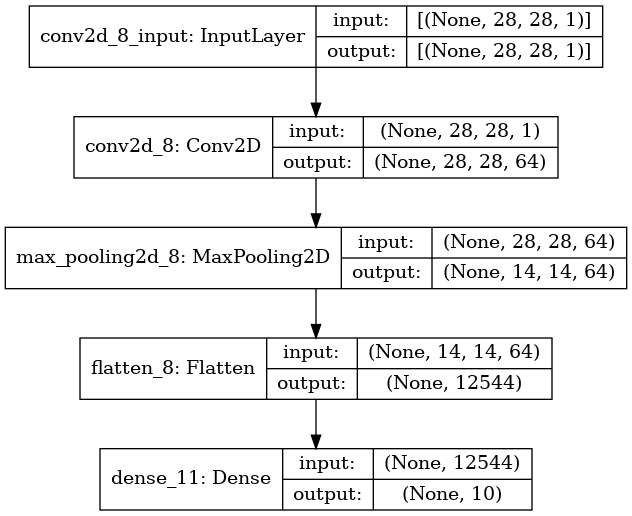

In [157]:
keras.utils.plot_model(model, show_shapes = True)

### Callback Class

In [158]:
class onStopTraining(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        acc = logs["accuracy"]
        if acc >= 0.99:
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [159]:
stopTraining = onStopTraining()

### Model Training

In [160]:
history = model.fit(dataset, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [stopTraining])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4879 - accuracy: 0.9448 - val_loss: 0.0899 - val_accuracy: 0.9762
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.0991 - val_accuracy: 0.9754
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.1175 - val_accuracy: 0.9726
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.1426 - val_accuracy: 0.9706
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.1565 - val_accuracy: 0.9718
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.1477 - val_accuracy: 0.9732
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.1846 - val_accuracy:

In [ ]:
# GRADED FUNCTION: train_mnist_conv
def train_mnist_conv():
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
    # YOUR CODE STARTS HERE

    # YOUR CODE ENDS HERE

    model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE

            # YOUR CODE ENDS HERE
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE

        # YOUR CODE ENDS HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]



In [ ]:
_, _ = train_mnist_conv()

In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);